In [1]:
from detection import Detection
import numpy as np
from scipy.signal import find_peaks_cwt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_SIZE = 1920
Y_SIZE = 1080

# Homography estimated by Ryan Paddle data (see notebook)
HOM = [[-5.97251010e+01,  6.13060731e+01,  9.24442835e+03],
       [-2.08624544e+00,  2.48309236e+00,  3.63199217e+02],
       [1.10514264e-03,  8.78972002e-03,  1.00000000e+00]]

HOM_INV = np.linalg.inv(HOM)

SHORE_POINT = [33.655844, -118.003742]
SHORE_DIR = 220

In [3]:
detection = Detection(SHORE_POINT, SHORE_DIR, HOM_INV, (X_SIZE, Y_SIZE))
detection.read_pkl("./data/wc-hbpierns.stream.20190902T170123863.detections.pkl")
detection.process(diagnostic=True)

Duration  601.4435846805573
Frame Rate  29.927994010544282
14.099090064914549
          timestamp          class          score             y1  \
count  7.287230e+05  728723.000000  728723.000000  728723.000000   
mean   1.567444e+09       2.699100       0.384524     836.248989   
std    1.743108e+02       1.309261       0.129325     110.123565   
min    1.567444e+09       1.000000       0.250179      54.087480   
25%    1.567444e+09       1.000000       0.302391     742.428288   
50%    1.567444e+09       3.000000       0.345989     782.441912   
75%    1.567444e+09       4.000000       0.407569     965.112222   
max    1.567444e+09       6.000000       0.990839    1074.941890   

                  x1             y2             x2       center_x  \
count  728723.000000  728723.000000  728723.000000  728723.000000   
mean     1087.737354     867.985262    1111.794423    1099.765889   
std       443.656458     125.362817     444.558301     443.993002   
min         0.000000     199.7699

In [4]:
surfiness = detection.get_surfed_waveiness()
surfiness_index = surfiness['shore_distance'] * surfiness['score']

In [26]:
peaks = find_peaks_cwt(surfiness_index, np.arange(1,300))
print(peaks)

[ 160  551  836 1114 1305 1600 1873 2411 2719 2936 3256 3601 4146 4509
 4756 5047 5349 5861 6201]


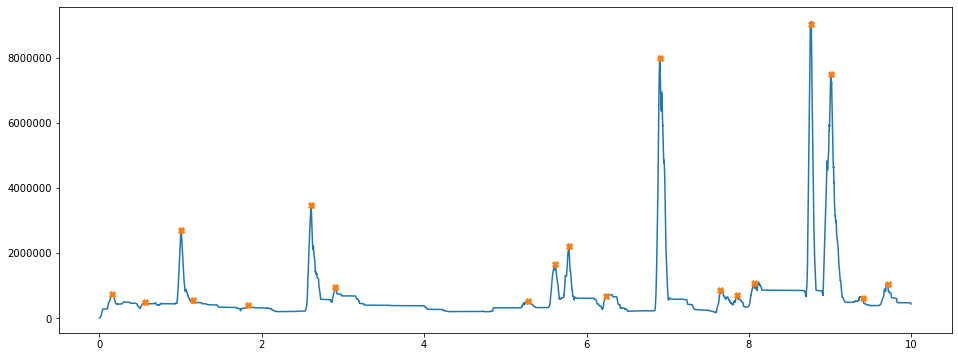

In [27]:
plt.figure(figsize=(16,6))
plt.plot((surfiness.index.values - detection.start_time) / 60., surfiness_index)
plt.plot((surfiness.index.values[peaks] - detection.start_time) / 60., surfiness_index.values[peaks], "X")

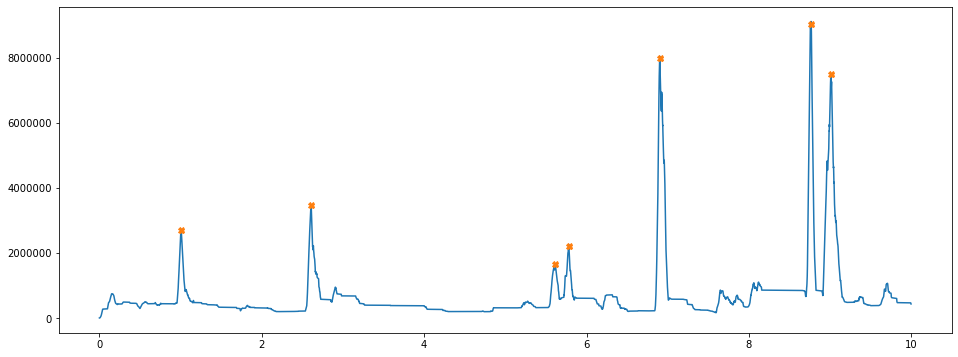

In [78]:
peaks = find_peaks_cwt(surfiness_index, np.arange(1,300))
peak_dat = np.column_stack((peaks,surfiness_index.values[peaks]))
#(surfiness.index.values[peaks] - detection.start_time)
peak_dat = peak_dat[peak_dat[:,1].argsort()]
count=7
peaks = peak_dat[-count:,0].astype('int')

plt.figure(figsize=(16,6))
plt.plot((surfiness.index.values - detection.start_time) / 60., surfiness_index)
plt.plot((surfiness.index.values[peaks] - detection.start_time) / 60., surfiness_index.values[peaks], "X")

In [38]:
waves = detection.data[detection.data['class'] == 6]
print(waves)

           timestamp  class     score          y1           x1          y2  \
4025    1.567444e+09      6  0.318697  868.646328   301.860952  910.060966   
4061    1.567444e+09      6  0.308815  868.811574   300.324326  911.274590   
4084    1.567444e+09      6  0.351756  868.953838   303.511534  911.583066   
4113    1.567444e+09      6  0.380759  869.358487   304.098587  911.722112   
4141    1.567444e+09      6  0.415847  869.280725   303.324022  912.210832   
4180    1.567444e+09      6  0.355327  869.172835   300.391874  911.536460   
4221    1.567444e+09      6  0.322313  869.889114   297.638683  911.841137   
4255    1.567444e+09      6  0.304042  869.593642   297.943039  912.189653   
40918   1.567444e+09      6  0.256459  899.155405  1165.330467  935.109022   
49991   1.567444e+09      6  0.332419  799.898264   653.391323  840.894477   
50017   1.567444e+09      6  0.385837  800.259719   651.255512  841.593633   
50056   1.567444e+09      6  0.409221  799.756901   650.247459  

In [53]:
waves['width'] = waves['x2'] - waves['x1']
plt.figure(figsize=(16, 9))
plt.scatter(waves['timestamp'][waves['width'] > 400], waves['shore_distance'][waves['width'] > 400])

/opt/conda/envs/camera-homography/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


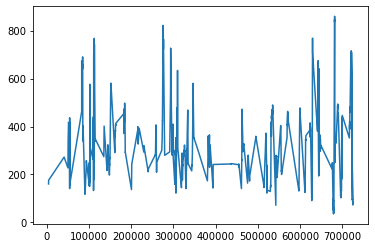

In [49]:
plt.plot(waves['x2'] - waves['x1'])